## Abstract

### Step 1: Calculating Financial risk of the person based on these features:

1)city

2)location_score

3)internal audit score

4)external audit score

5)financial score

6)loss score

7)Past_results

8)isUnderRisk

#### Dataset : https://www.kaggle.com/datasets/gauravduttakiit/financial-risk-prediction-weekend-hackathon

# Import Libraries 

In [204]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [205]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [206]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Preprocessing

In [207]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns 
import numpy as np

In [208]:
# load the dataset 

In [209]:
train_data = pd.read_csv("Risk_Dataset/Train.csv")

In [210]:
train_data.sample(10)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
248,17,20.078,7,5,7,8,1,0
30,40,21.448,5,7,7,3,1,0
217,1,72.068,3,5,7,8,1,0
319,10,13.762,8,8,8,7,0,1
96,2,11.506,13,10,11,8,1,1
190,8,22.090,12,7,7,5,1,1
422,0,16.903,12,9,10,5,1,1
219,23,9.546,7,3,5,7,1,1
299,6,17.594,11,7,10,4,1,1
443,30,14.507,11,15,11,7,1,1


# EDA 

In [211]:
# Check Shape
train_data.shape

(543, 8)

In [212]:
train_data.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [213]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [214]:
train_data.corr()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
City,1.000000,0.012551,-0.024306,-0.049994,-0.051779,0.033183,0.004762,-0.087463
Location_Score,0.012551,1.000000,-0.358629,-0.205775,-0.264536,-0.042139,-0.074364,-0.423956
Internal_Audit_Score,-0.024306,-0.358629,1.000000,0.453839,0.365133,0.007685,0.112093,0.586097
External_Audit_Score,-0.049994,-0.205775,0.453839,1.000000,0.433374,-0.038786,0.141163,0.435619
Fin_Score,-0.051779,-0.264536,0.365133,0.433374,1.000000,-0.078573,0.138111,0.362463
Loss_score,0.033183,-0.042139,0.007685,-0.038786,-0.078573,1.000000,0.081858,0.044888
Past_Results,0.004762,-0.074364,0.112093,0.141163,0.138111,0.081858,1.000000,0.102120
IsUnderRisk,-0.087463,-0.423956,0.586097,0.435619,0.362463,0.044888,0.102120,1.000000


<Axes: >

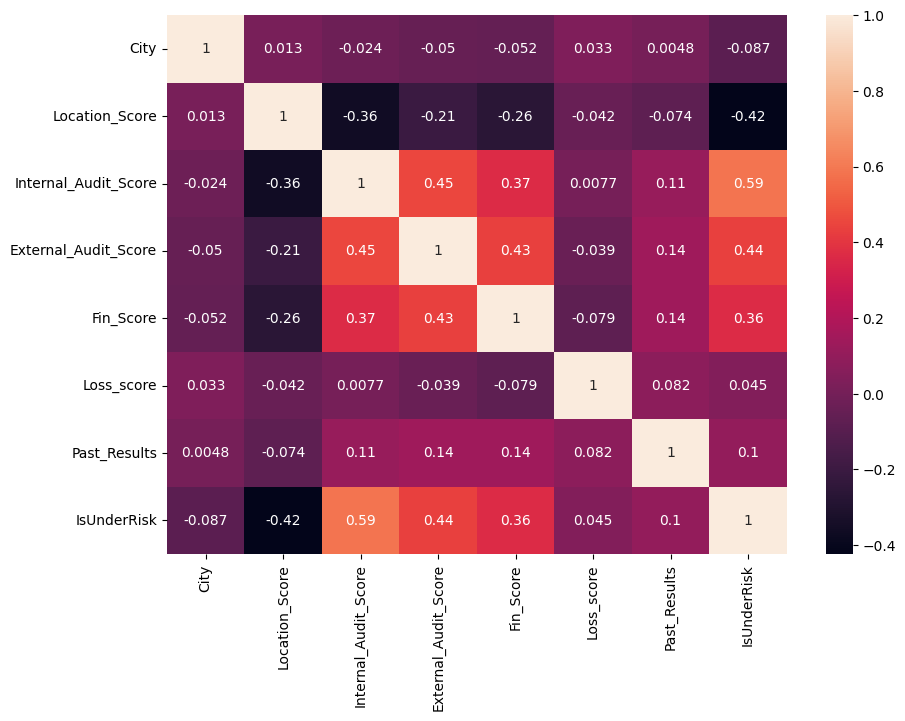

In [215]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True)

In [216]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()
# Find pairs of variables with correlation close to 0
threshold = 0.1  # You can adjust this threshold based on your needs
non_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) < threshold:
            non_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Pairs of variables with low correlation:")
for pair in non_correlated_pairs:
    print(pair)

Pairs of variables with low correlation:
('City', 'Location_Score')
('City', 'Internal_Audit_Score')
('City', 'External_Audit_Score')
('City', 'Fin_Score')
('City', 'Loss_score')
('City', 'Past_Results')
('City', 'IsUnderRisk')
('Location_Score', 'Loss_score')
('Location_Score', 'Past_Results')
('Internal_Audit_Score', 'Loss_score')
('External_Audit_Score', 'Loss_score')
('Fin_Score', 'Loss_score')
('Loss_score', 'Past_Results')
('Loss_score', 'IsUnderRisk')


In [217]:
# Find pairs of variables with correlation close to 1 or -1
threshold = 0.8  # You can adjust this threshold based on your needs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Pairs of variables with high correlation:")
for pair in highly_correlated_pairs:
    print(pair)

Pairs of variables with high correlation:


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Internal_Audit_Score'),
  Text(2, 0, 'External_Audit_Score'),
  Text(3, 0, 'Loss_score'),
  Text(4, 0, 'Past_Results')])

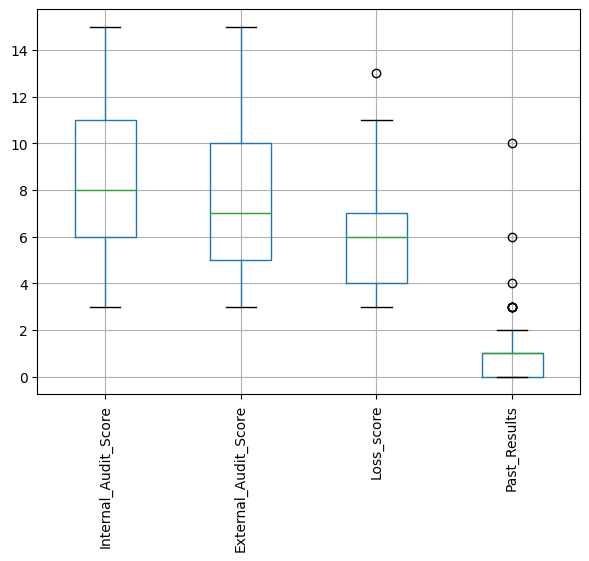

In [218]:
plt.figure(figsize=(7,5))
train_data.boxplot(column=['Internal_Audit_Score','External_Audit_Score','Loss_score','Past_Results'])
plt.xticks(rotation='vertical')

In [219]:
train_data.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

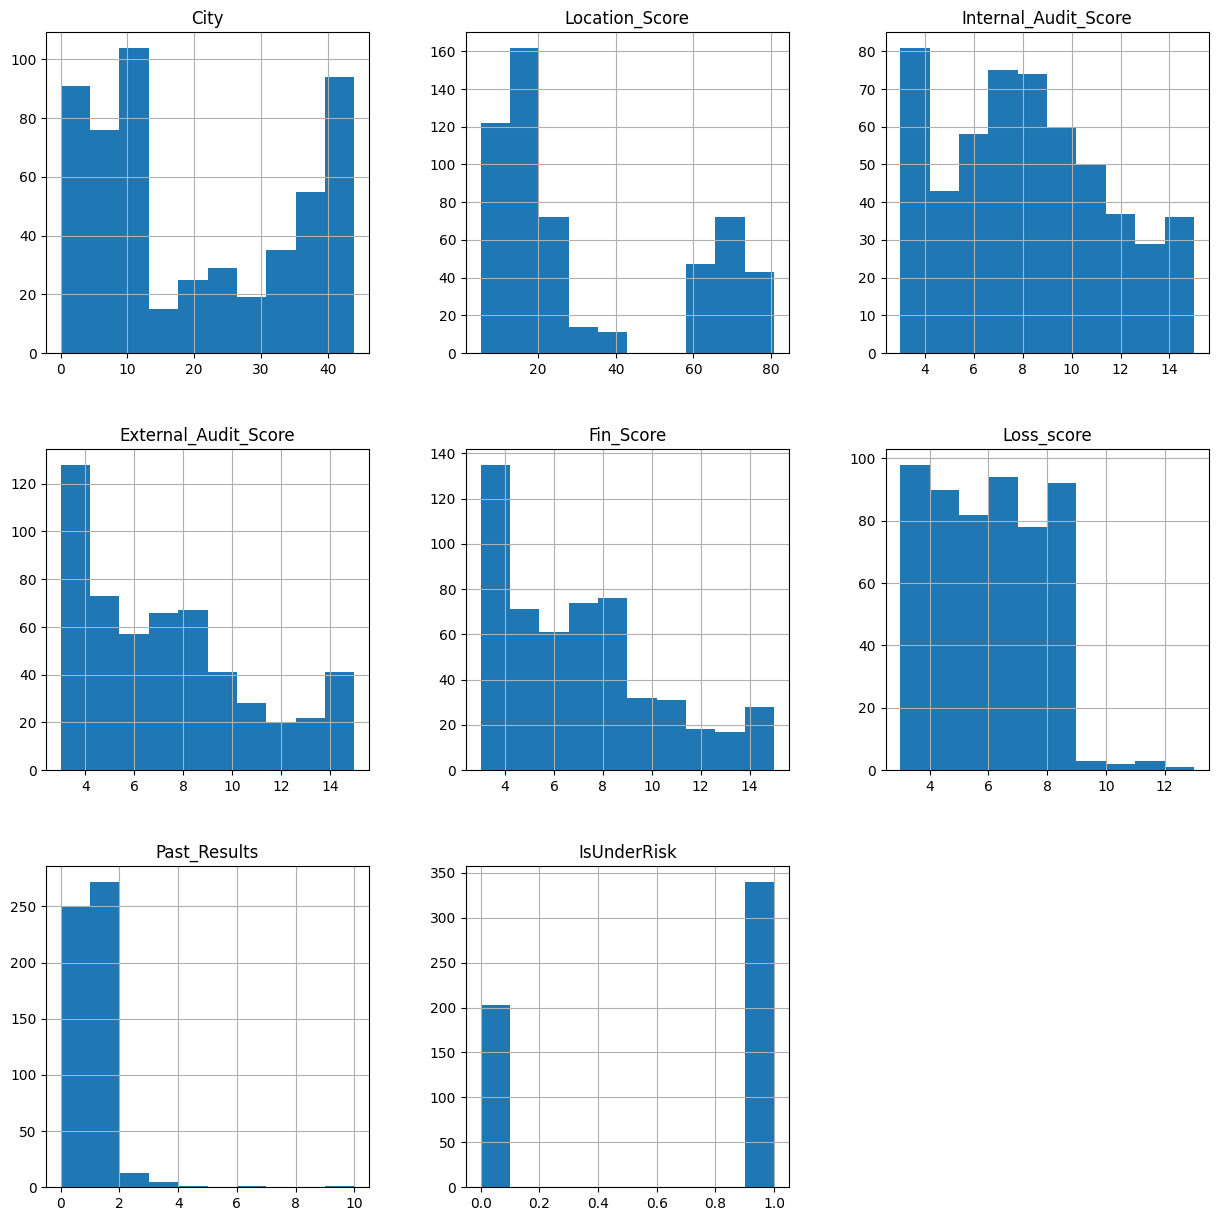

In [220]:
train_data.hist(figsize=(15,15))
plt.show()


/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_74229/4223122307.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[column], shade=True)
/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_74229/4223122307.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[column], shade=True)
/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_74229/4223122307.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[column], shade=True)
/var/folders/nz/ykxxlpcj6d314kj4z21t58rm0000gn/T/ipykernel_74229/4223122307.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; set

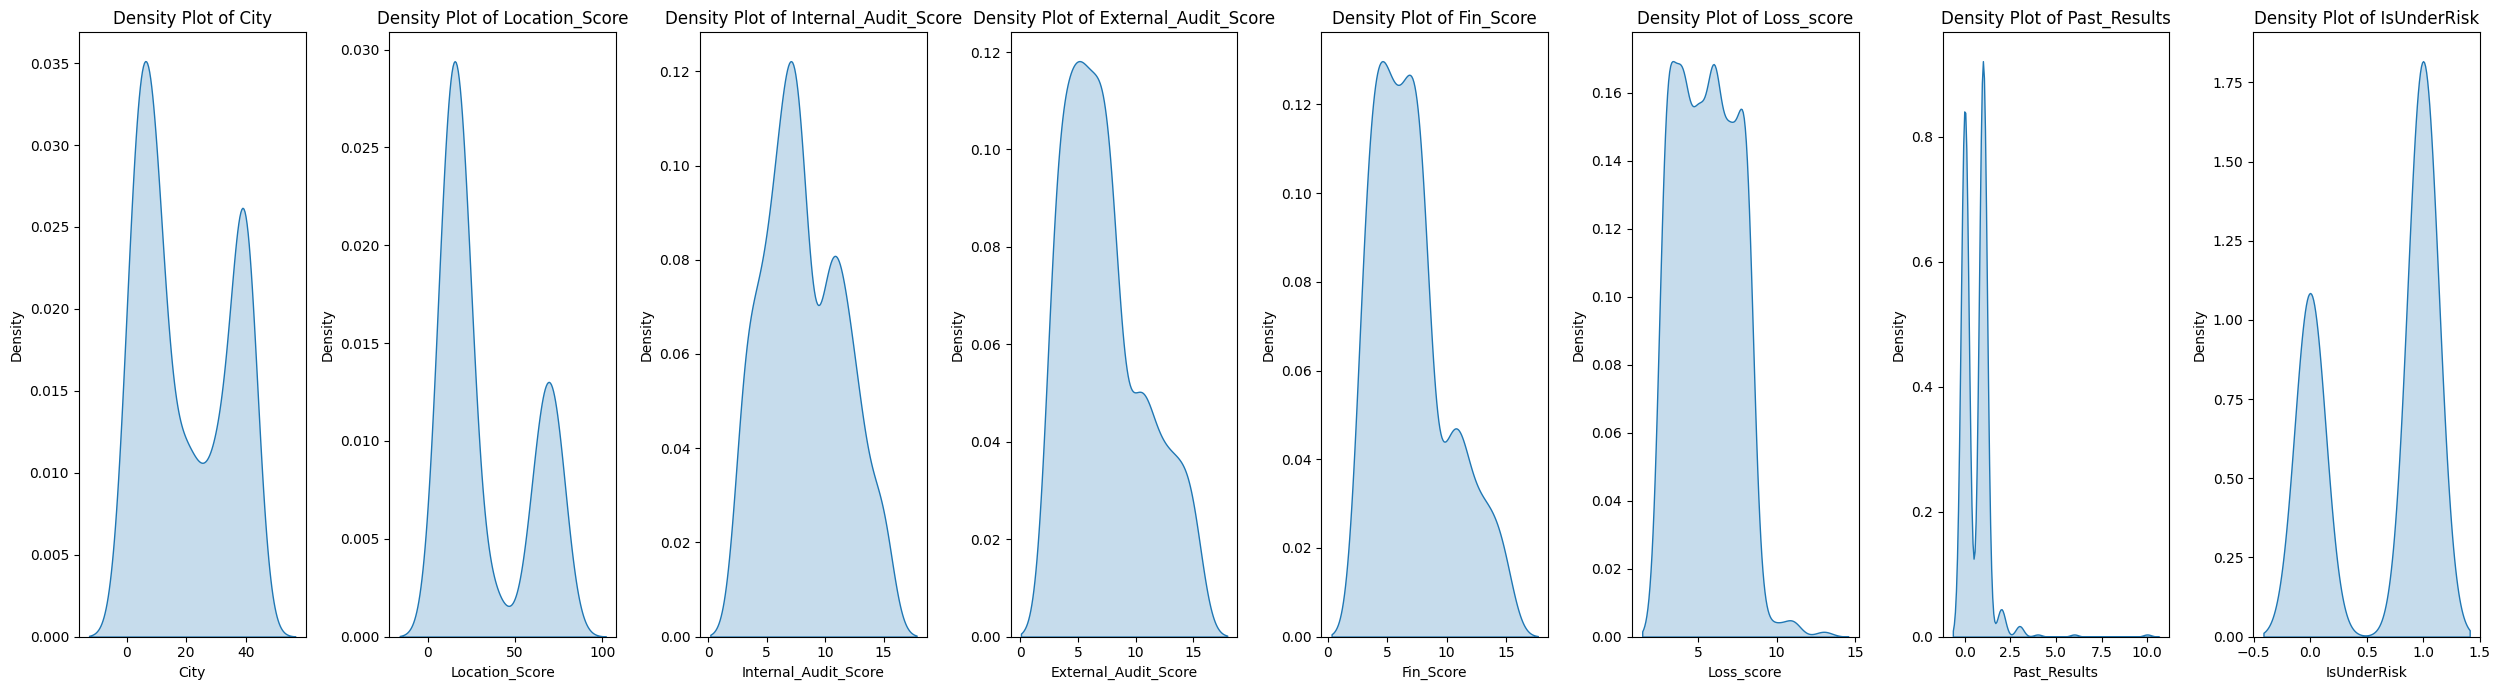

In [221]:
plt.figure(figsize=(25,7))
# Loop through each column and create a density plot
for column in train_data.columns:
    plt.subplot(1, len(train_data.columns), train_data.columns.get_loc(column) + 1)
    sns.kdeplot(train_data[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

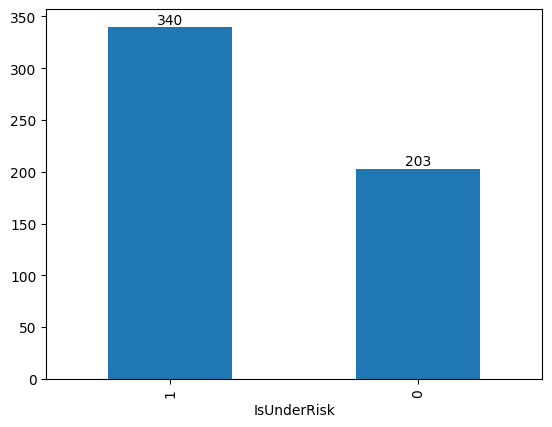

In [222]:
ax = train_data.IsUnderRisk.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [223]:
train_data.head(10)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
5,1,6.237,10,10,12,3,1,1
6,9,13.795,8,3,5,3,0,0
7,23,74.132,11,15,5,8,0,1
8,40,69.522,8,4,7,6,0,0
9,38,6.577,8,5,7,3,1,0


## Splitting Dataset

In [224]:
# divide independent varibale and dependent varibale

In [225]:
X= train_data.drop(['IsUnderRisk'], axis=1)
y = train_data['IsUnderRisk']

In [226]:
X

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,2,8.032,14,8,3,6,0
1,31,77.730,8,3,3,8,1
2,40,59.203,3,12,11,3,0
3,12,73.080,4,5,7,6,0
4,4,15.666,13,15,6,7,2
...,...,...,...,...,...,...,...
538,16,74.017,7,4,5,7,1
539,2,70.460,7,5,6,4,0
540,1,79.243,7,5,3,8,1
541,40,69.140,7,8,4,5,1


In [227]:
print(train_data.columns)

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')


In [228]:
y

0      1
1      0
2      1
3      0
4      1
      ..
538    0
539    0
540    0
541    1
542    1
Name: IsUnderRisk, Length: 543, dtype: int64

## Ranges of the predictor variables

<Axes: >

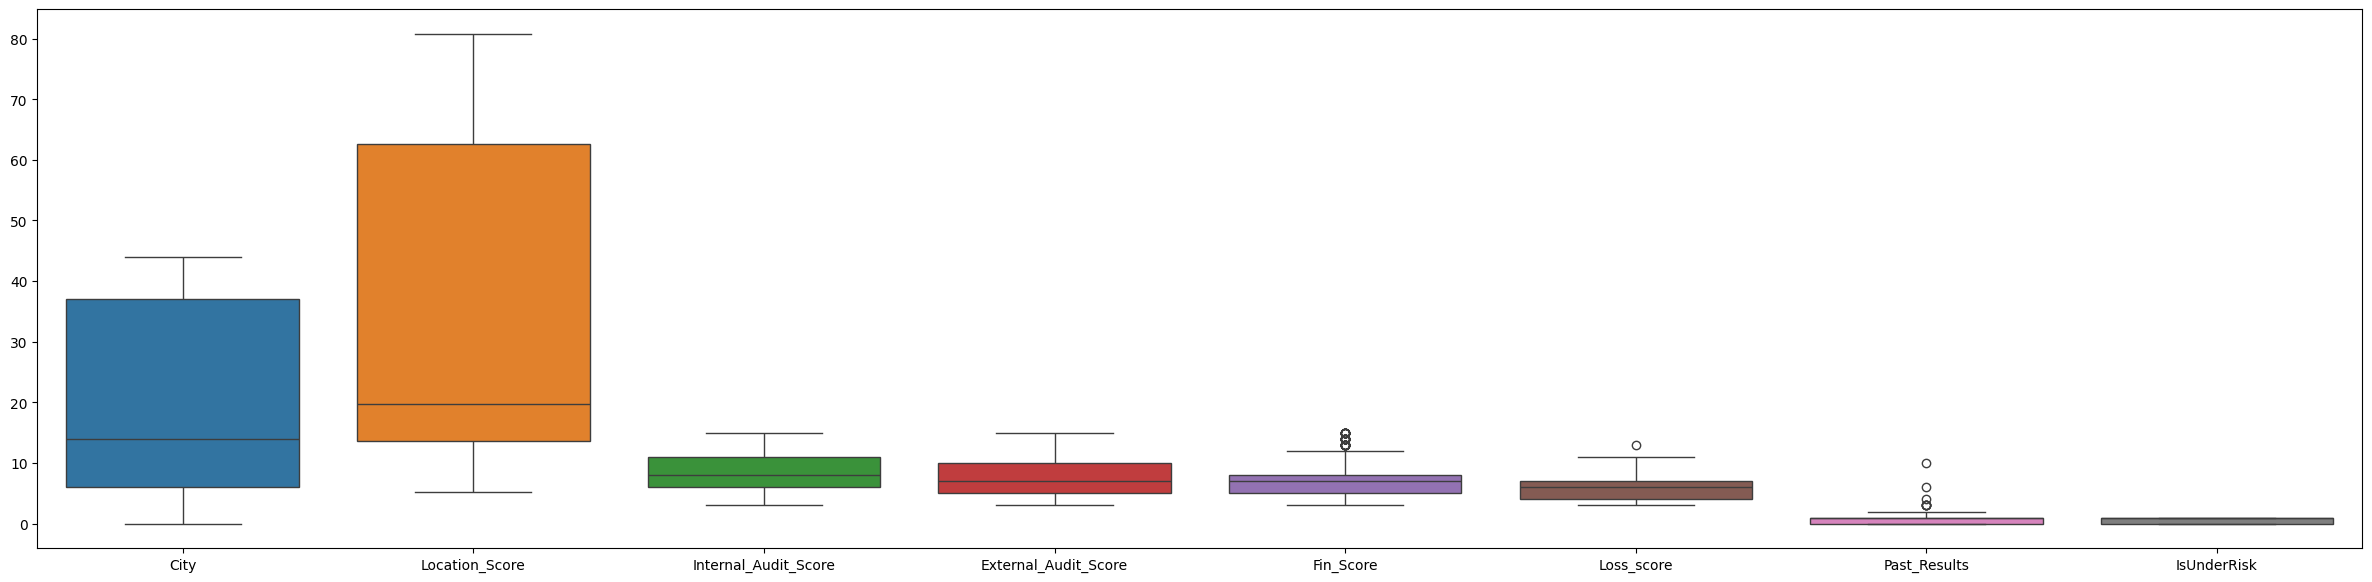

In [229]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(30, 7))
sns.boxplot(train_data)

## Outlier Treatment

In [230]:
def outlier_treatment(train_data):
    # Identify numeric columns
    numeric_columns = train_data.select_dtypes(include=[np.number]).columns

    # Loop through each numeric column
    for column in numeric_columns:
        # Calculate the z-score for each data point in the column
        z_scores = (train_data[column] - train_data[column].mean()) / train_data[column].std()

        # Define the threshold for outliers
        threshold = 3

        # Identify outlier indices
        outlier_indices = np.abs(z_scores) > threshold

        # Replace outlier values with the median
        train_data.loc[outlier_indices, column] = train_data[column].median()

    return train_data

train_data = outlier_treatment(train_data)

## Normalisation

In [231]:
## StandardScalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_copy = train_data.copy()
train_data_copy = scaler.fit_transform(train_data_copy)

**After Normalisation, checking predictor variables**

<Axes: >

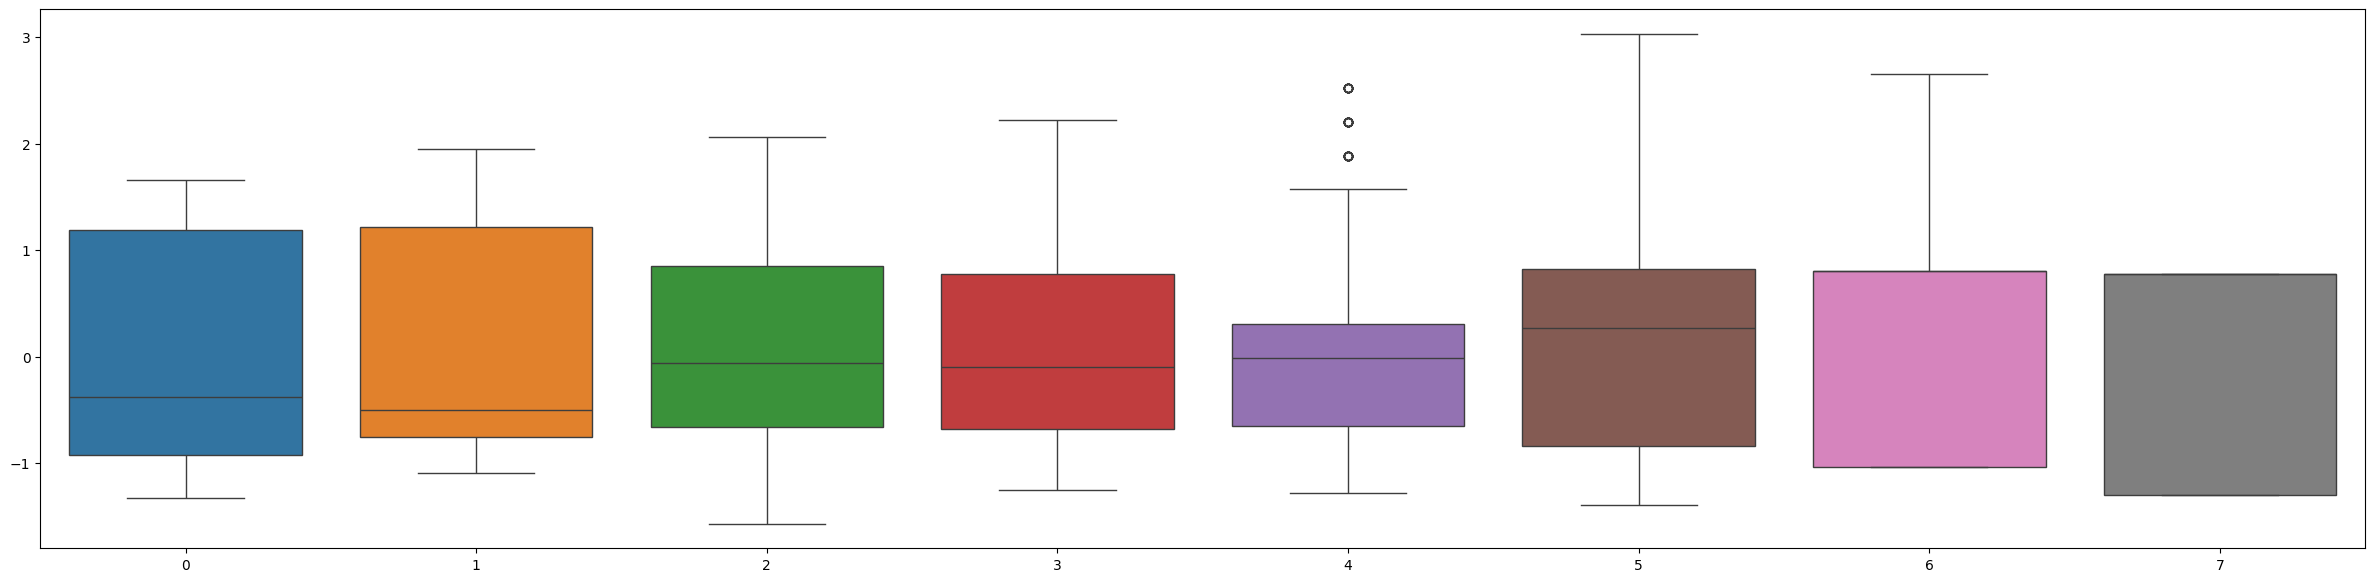

In [232]:
# Checking the Ranges of the predictor variables and dependent variable  after normalization
plt.figure(figsize=(30, 7))
sns.boxplot(train_data_copy)

**Here  we did normalisation for interpretability of the model by putting features on a common scale. It makes it easier to understand the relative importance and contribution of each feature to the model's predictions.**

## Splitting Data into Train and Test

In [233]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [234]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.2 ,random_state= 42)

## Pairplot

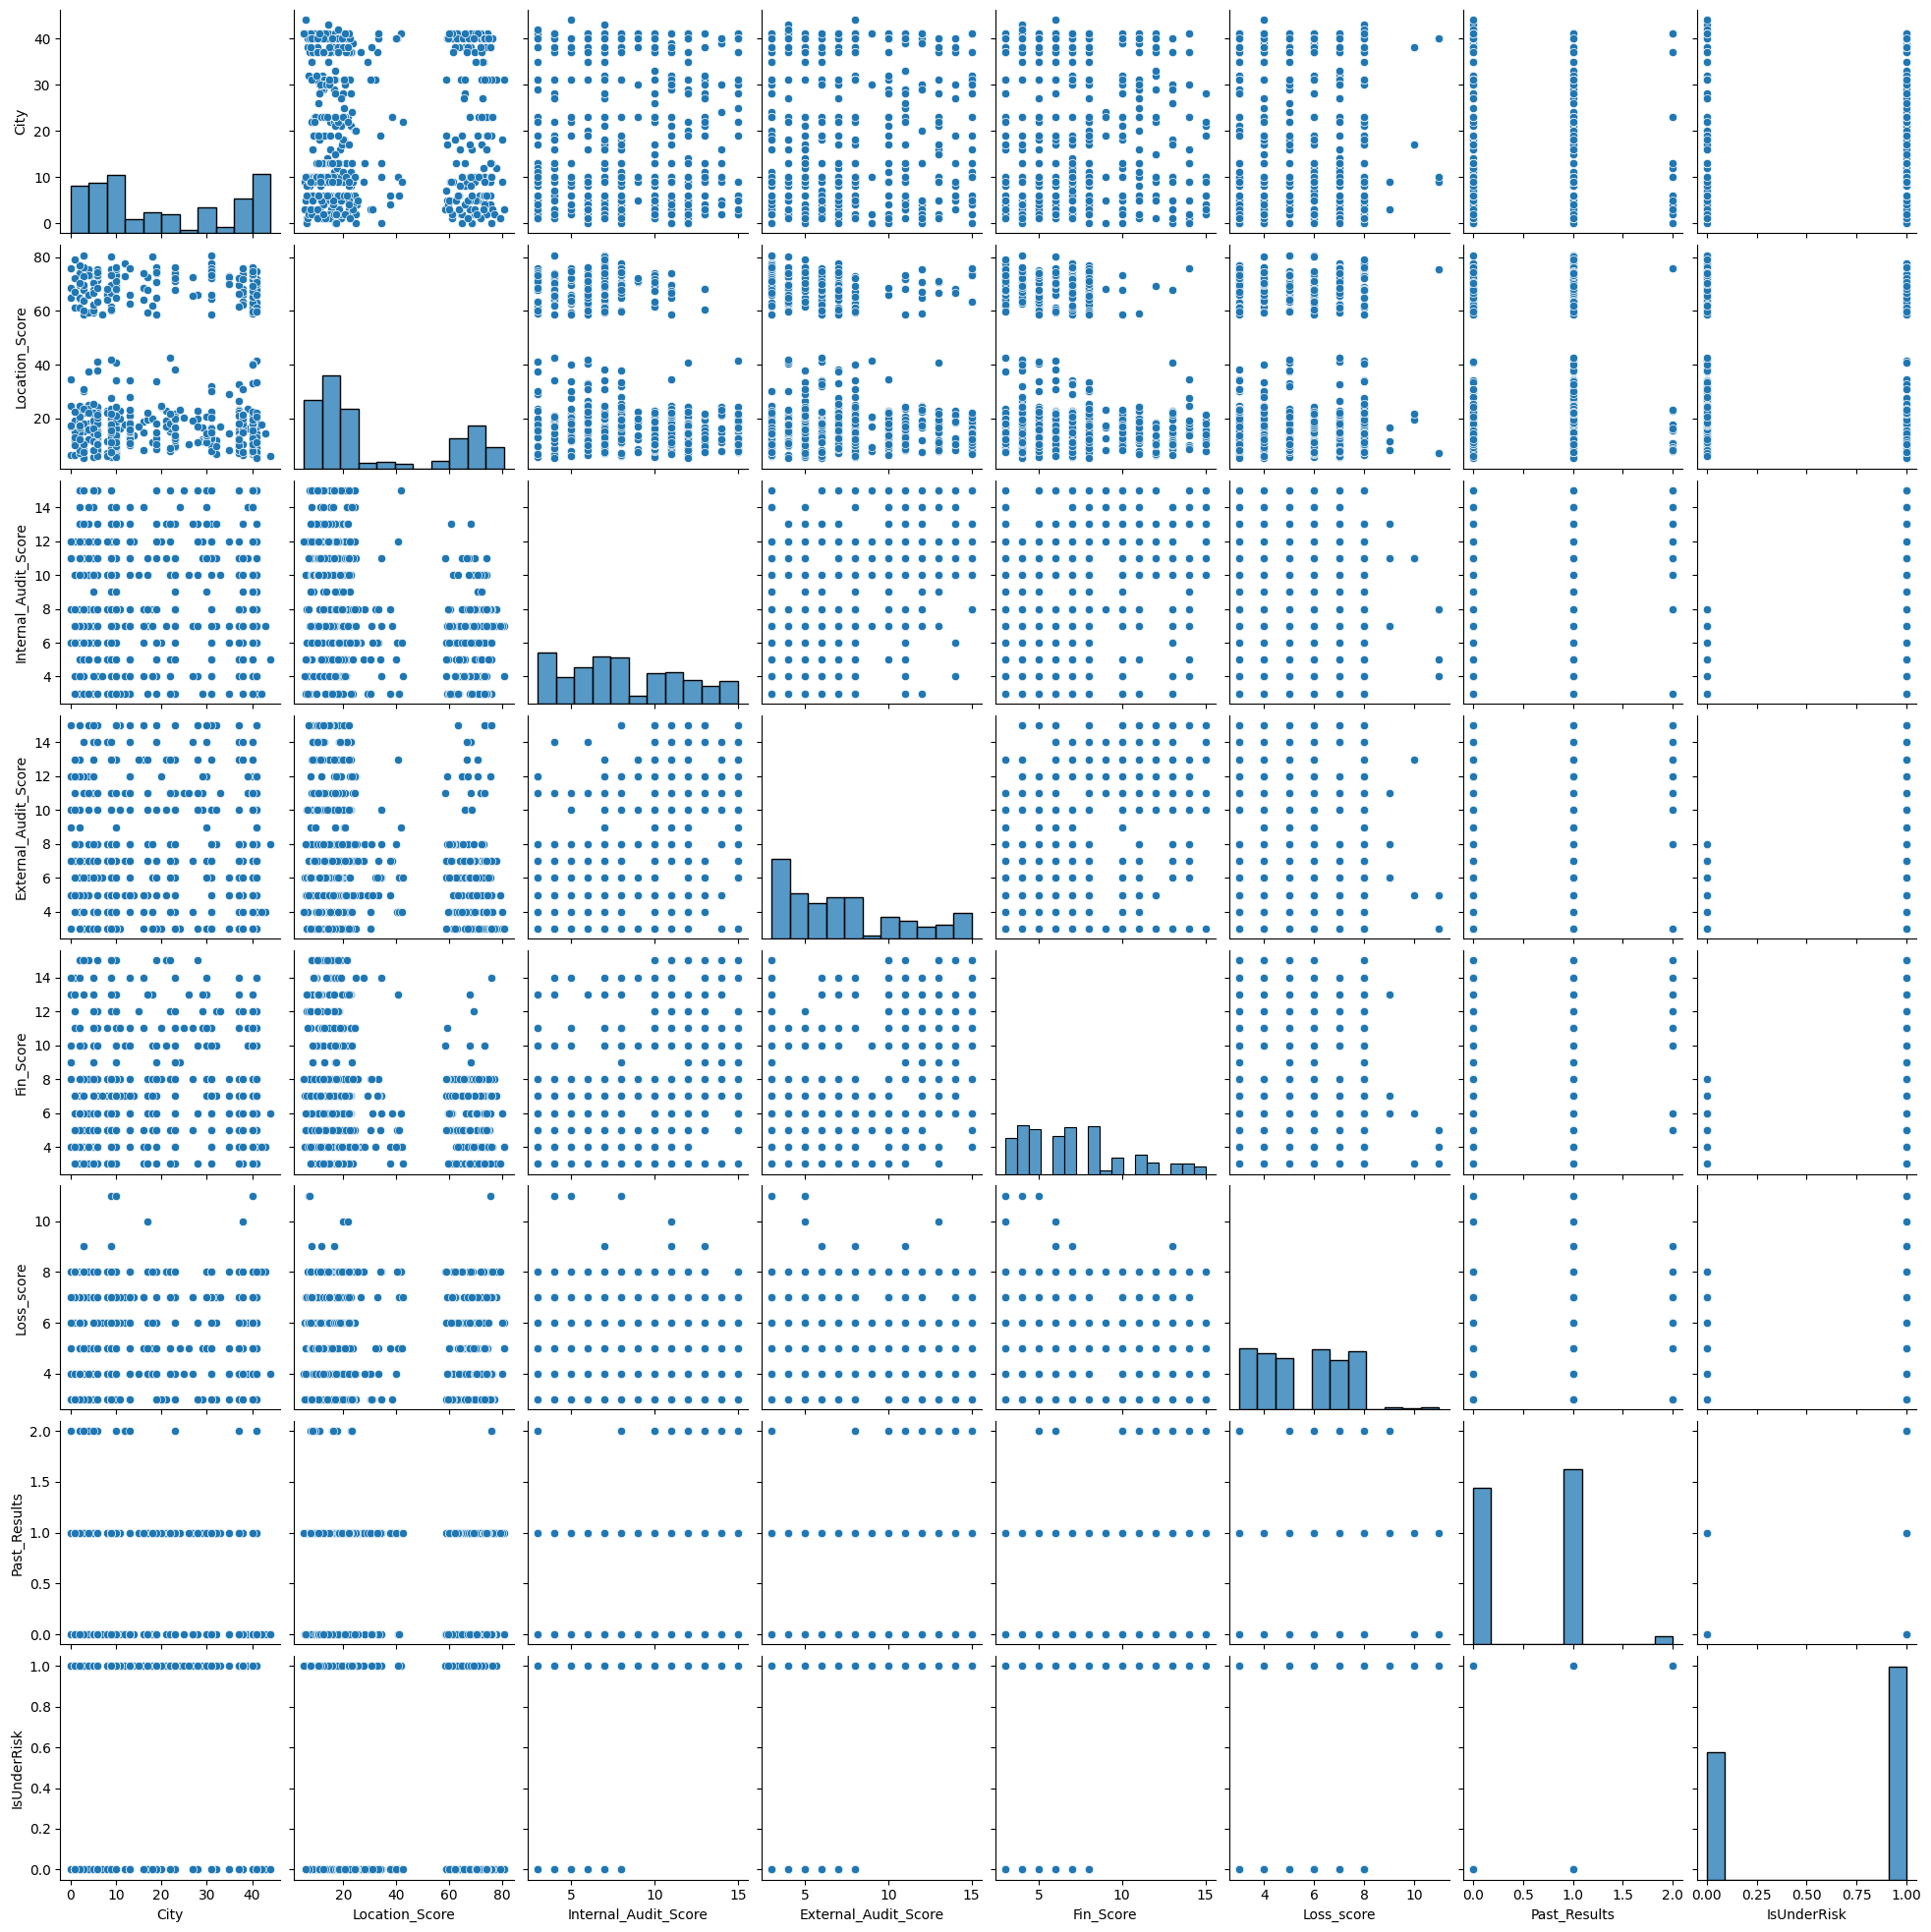

In [235]:
sns.pairplot(train_data)

## Multicollinearlity(Variance Inflation Factor)

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
# Assigning features to the 'features' column
vif['features'] = train_data[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk']].columns

# Calculating VIF for each feature
vif['VIF Factor'] = [variance_inflation_factor(train_data[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk']].values, i) for i in range(train_data.shape[1])]

# Rounding VIF values
vif = vif.round(1)

# Sorting by VIF Factor
vif = vif.sort_values(by="VIF Factor", ascending=True)

# Printing the result
vif

,features,VIF Factor
6,Past_Results,2.1
0,City,2.6
1,Location_Score,2.6
7,IsUnderRisk,4.8
5,Loss_score,6.7
4,Fin_Score,7.2
3,External_Audit_Score,7.9
2,Internal_Audit_Score,10.9


# Evalution

# 1. Logistics Regression Model 


In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn .metrics import confusion_matrix,classification_report,accuracy_score

In [238]:
lr = LogisticRegression()

In [239]:
model = lr.fit(X_train,y_train)

In [240]:
y_predict= model.predict(X_test)

In [241]:
model.score(X_train,y_train)

0.8317972350230415

In [242]:
model.intercept_

array([-5.9001392])

In [243]:
model.coef_

array([[-0.01599315, -0.02579229,  0.52462634,  0.27294922,  0.24079964,
         0.0689765 ,  0.16734311]])

In [244]:
confusion_matrix(y_test, y_predict)

array([[25,  7],
       [15, 62]])

In [245]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69        32
           1       0.90      0.81      0.85        77

    accuracy                           0.80       109
   macro avg       0.76      0.79      0.77       109
weighted avg       0.82      0.80      0.80       109



### Intercepting Linear coeffients

In [246]:
import statsmodels.api as sm
reg = sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            IsUnderRisk   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              219.0
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                   5.41e-137
Time:                        11:30:59   Log-Likelihood:                         -176.41
No. Observations:                 434   AIC:                                      366.8
Df Residuals:                     427   BIC:                                      395.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
City                    -0.0026      0.001     -2.256      0.025      -0.005      -0.000
Location_Score          -0.0045      0.001     -6.761      0.000      -0.006      -0.003
Internal_Audit_Score     0.0579      0.006      9.766      0.000       0.046       0.070
External_Audit_Score     0.0235      0.006      3.816      0.000       0.011       0.036
Fin_Score                0.0158      0.006      2.562      0.011       0.004       0.028
Loss_score               0.0087      0.008      1.122      0.262      -0.007       0.024
Past_Results             0.0007      0.027      0.026      0.979      -0.053       0.055
==============================================================================
Omnibus:                       34.458   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.904
Skew:                           0.350   Prob(JB):                     7.85e-05
Kurtosis:                       2.255   Cond. No.                         71.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate accuracy

In [247]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7981651376146789


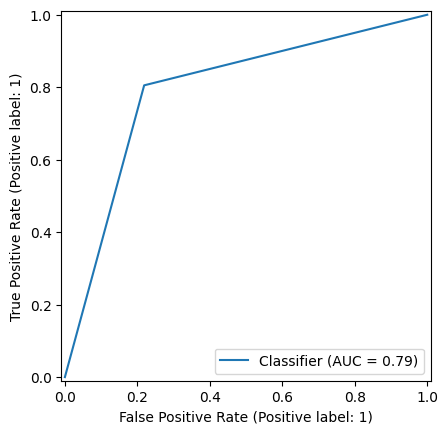

In [248]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_predict)

# 2. Decision Tree model 

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [250]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
dt= DecisionTreeClassifier()

In [252]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [253]:
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

In [254]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [255]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [256]:
# Train a final model using the best parameters on the entire training set
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5)

In [257]:
# Predict on the validation set
y_pred = final_model.predict(X_val)

In [258]:
# Chech train model score

In [259]:
grid_search.score(X_train,y_train)

0.9400921658986175

### Calculate accuracy

In [260]:

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8256880733944955


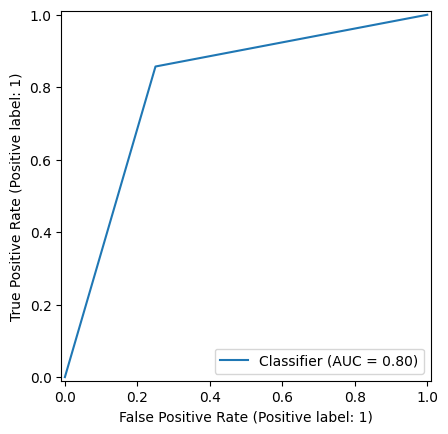

In [261]:
RocCurveDisplay.from_predictions(y_test,y_pred)

### Tree Node interpretation

[Text(0.5505952380952381, 0.9615384615384616, 'Internal_Audit_Score <= 8.5\ngini = 0.478\nsamples = 434\nvalue = [171, 263]'),
 Text(0.5267857142857143, 0.8846153846153846, 'Fin_Score <= 8.5\ngini = 0.468\nsamples = 273\nvalue = [171, 102]'),
 Text(0.5029761904761905, 0.8076923076923077, 'Location_Score <= 23.564\ngini = 0.43\nsamples = 249\nvalue = [171, 78]'),
 Text(0.25595238095238093, 0.7307692307692307, 'Internal_Audit_Score <= 5.5\ngini = 0.499\nsamples = 114\nvalue = [59.0, 55.0]'),
 Text(0.15476190476190477, 0.6538461538461539, 'Location_Score <= 19.024\ngini = 0.375\nsamples = 40\nvalue = [30, 10]'),
 Text(0.09523809523809523, 0.5769230769230769, 'Internal_Audit_Score <= 3.5\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(0.047619047619047616, 0.5, 'City <= 11.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.023809523809523808, 0.4230769230769231, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.07142857142857142, 0.4230769230769231, 'gini = 0.444\nsamples = 6\

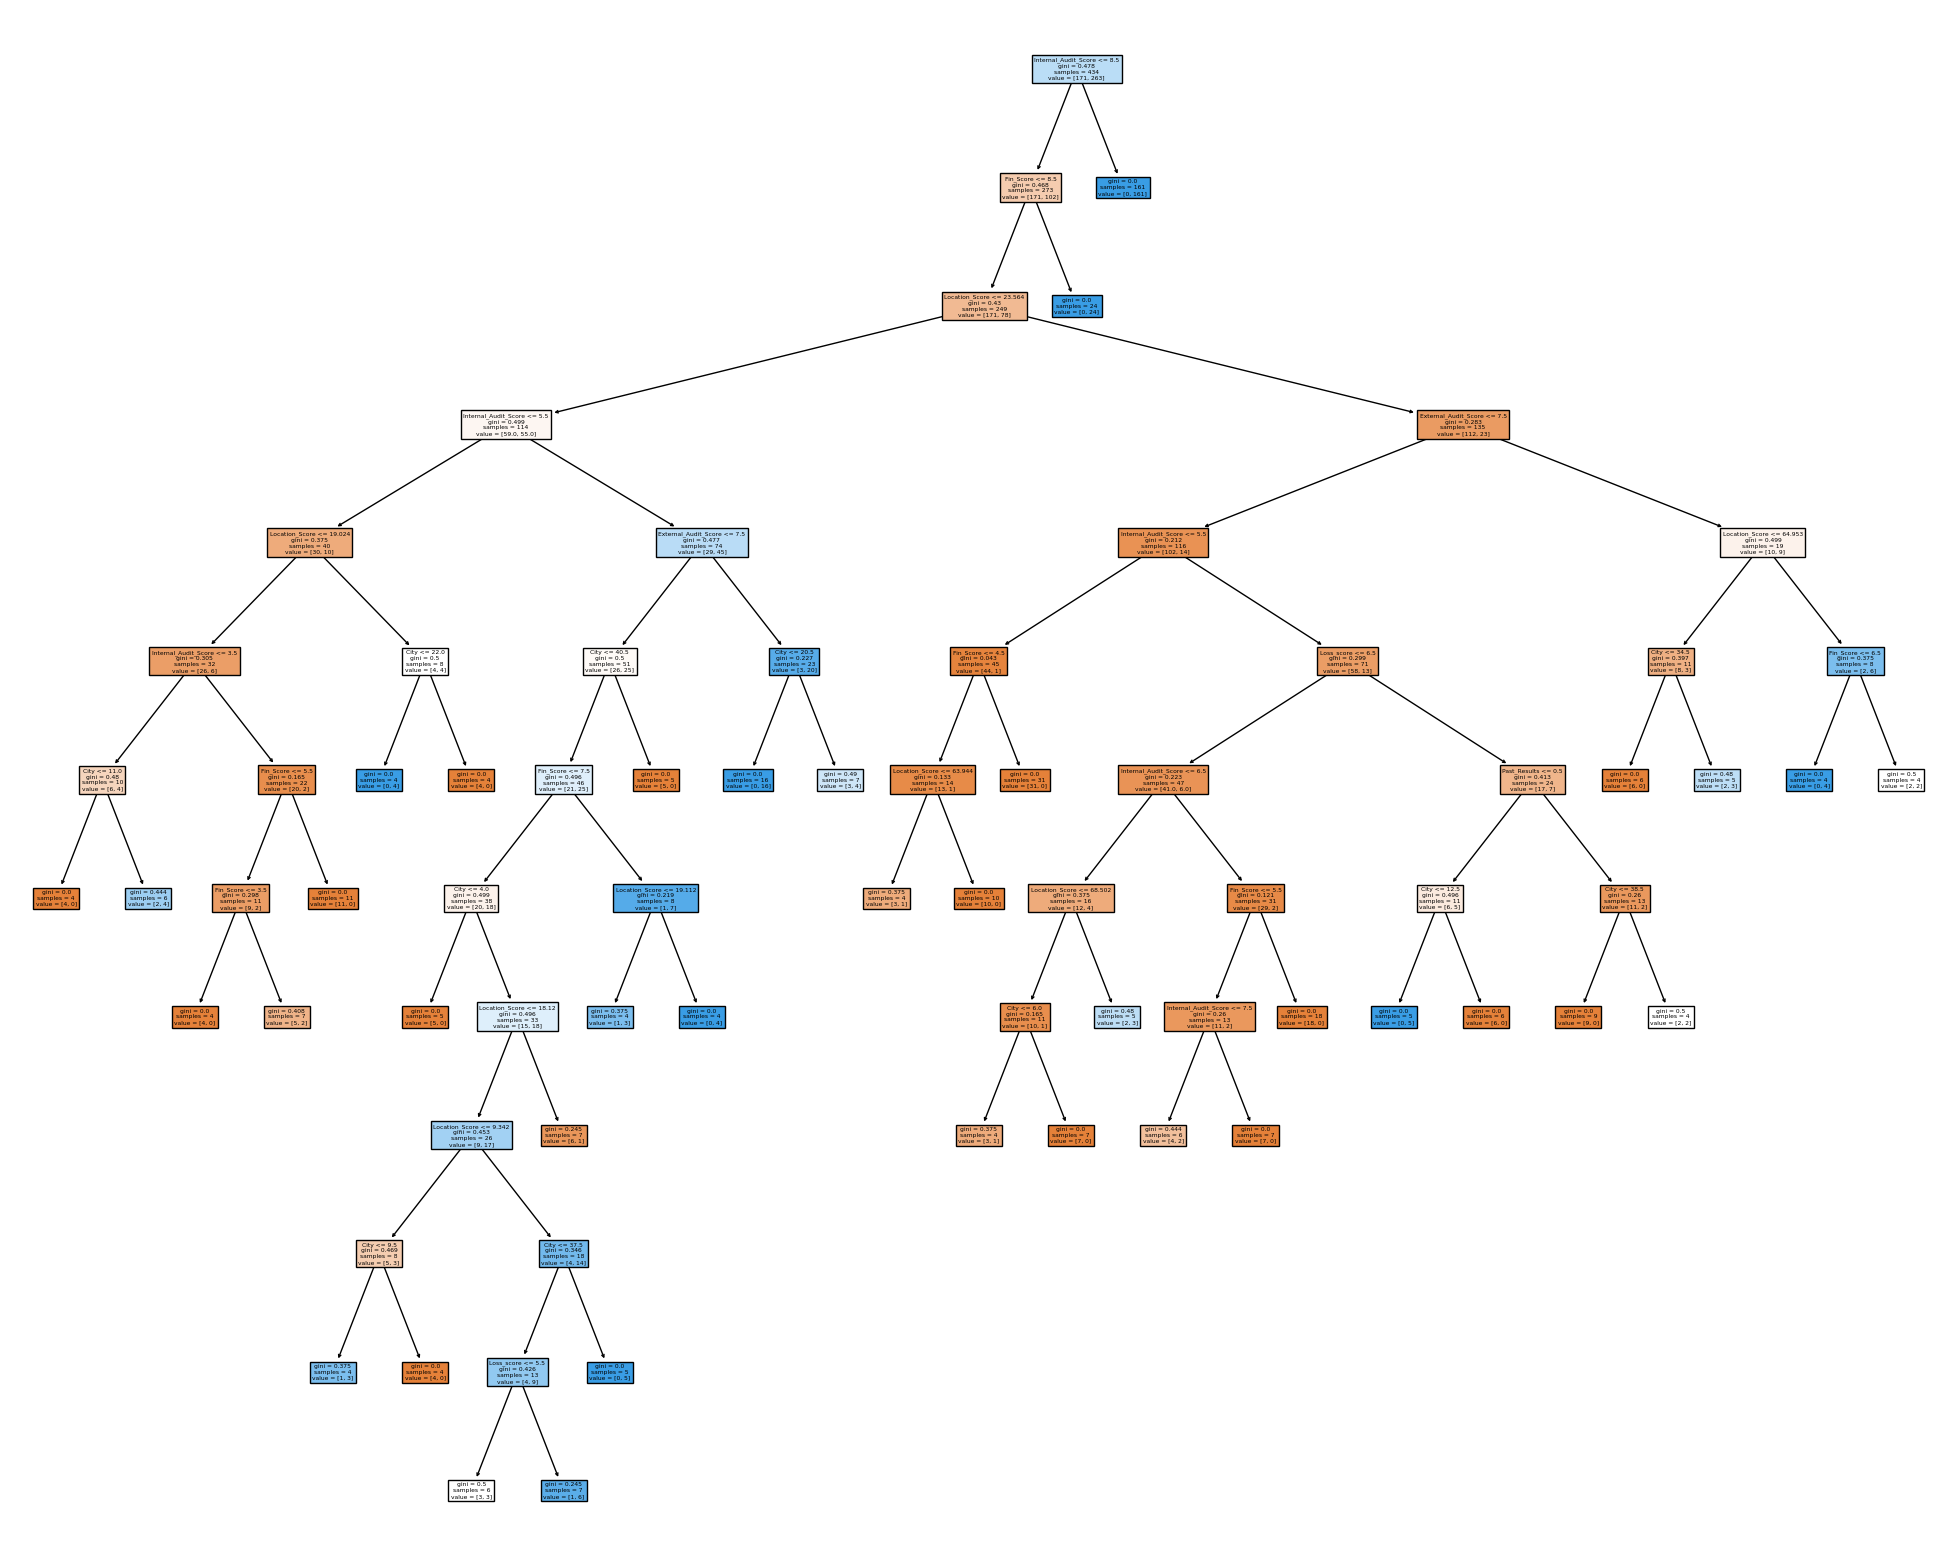

In [262]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(final_model, feature_names= train_data.columns, filled=True)

# 3. Random Forest Classifier Model

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
# Best parameters found through grid search or other method
best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

In [265]:
# Create a Random Forest classifier with the best parameters

In [266]:
rf_classifier = RandomForestClassifier(**best_params,random_state=42)

In [267]:
# Train the classifier on the training data
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [268]:
# Make predictions on the testing data

In [269]:
y_pred = rf_classifier.predict(X_test)

### Calculate accuracy

In [270]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8532110091743119


## Saving Data in Pickle format

In [271]:
# Save the trained classifier to a pickle file
import pickle
with open('./Pickle Saved Data/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

## SHAP Analysis 


In [272]:
pip install SHAP

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [273]:
import shap

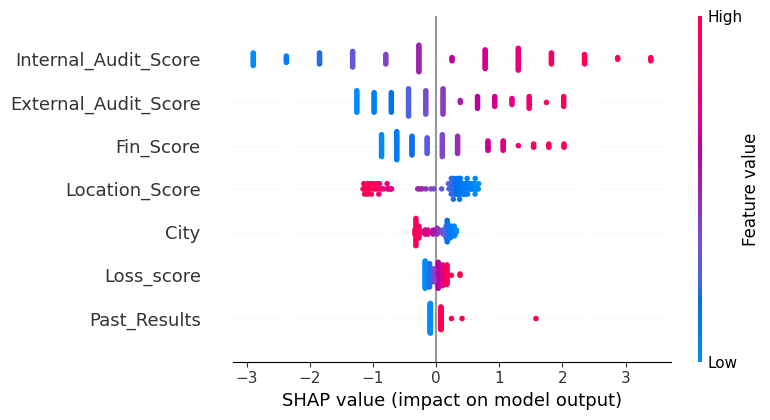

In [276]:
explainer = shap.Explainer(model, X_test)
    # Compute SHAP values for the test data
shap_values = explainer(X_test)
    # Plot the SHAP values for the first instance
shap.summary_plot(shap_values, X_test)

## References

Shap: https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://shap.readthedocs.io/en/latest/tabular_examples.html

https://www.kaggle.com/datasets/gauravduttakiit/financial-risk-prediction-weekend-hackathon

## License

MIT License

Copyright (c) 2024 Sathwik Reddy Chelemela

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.